### Importing Data and Libraries

In [106]:
import pandas as pd 
import numpy as np 

# To convert from Json to list
import ast

# For knn 
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# For visulazation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Importing Dataset
df1=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_dataset.csv')
df2=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_credits.csv')

### Data Cleaning, Preprocessing, and Analysing

In [3]:
print(df1.shape)
df1.head(2)

(5798, 21)


,Unnamed: 0,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
df1.columns

Index(['Unnamed: 0', 'budget', 'genres', 'homepage', 'tmdbId', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
# Feature Extraction
df1 = df1.drop(columns=['Unnamed: 0','budget','homepage','original_title','production_companies','production_countries','revenue','spoken_languages','status','tagline'])
print(df1.shape)
df1.head(2)

(5798, 11)


,genres,tmdbId,keywords,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
# Check for missing values
missing_values = df1.isnull().any()

# Check for duplicates
duplicates = df1.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
genres               False
tmdbId               False
keywords             False
original_language    False
overview              True
popularity           False
release_date          True
runtime               True
title                False
vote_average         False
vote_count           False
dtype: bool

Duplicates:
False


In [7]:
print(df1['release_date'].isnull().sum())
print(df1['runtime'].isnull().sum())

df1.dropna(subset=['release_date', 'runtime'], inplace=True)

1
2


In [8]:
#fill missing values with a default description
df1['overview'] = df1['overview'].fillna('No overview available')
# Count missing values in the 'overview' column
overview_missing_count = df1['overview'].isnull().sum()

# Print the count of missing values in the 'overview' column
print("Count of missing values in the 'overview' column:", overview_missing_count)

Count of missing values in the 'overview' column: 0


In [9]:
# Check for missing values
missing_values = df1.isnull().any()

# Check for duplicates
duplicates = df1.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
genres               False
tmdbId               False
keywords             False
original_language    False
overview             False
popularity           False
release_date         False
runtime              False
title                False
vote_average         False
vote_count           False
dtype: bool

Duplicates:
False


In [10]:
print(df2.shape)
df2.head(2)

(5798, 4)


,Unnamed: 0,tmdbId,cast,crew
0,0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [11]:
df2 = df2.drop(columns=['Unnamed: 0'])
print(df2.shape)
df2.head(2)

(5798, 3)


,tmdbId,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [12]:
# Check for missing values
missing_values = df2.isnull().any()

# Check for duplicates
duplicates = df2.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
tmdbId    False
cast      False
crew      False
dtype: bool

Duplicates:
False


In [13]:
# Method to convert features from Json to list
def transform(obj):
    T = []
    for t in ast.literal_eval(obj):
        t["name"]
        T.append(t["name"])
    return T

In [14]:
df1["genres"] = df1["genres"].apply(transform)

In [15]:
df1["keywords"] = df1["keywords"].apply(transform)

In [16]:
# Method to convert features from Json to list
def transform_3(obj):
    T = []
    counter = 0
    for t in ast.literal_eval(obj):
        if counter != 3:
            T.append(t["name"])
            counter+=1
        else:
            break
    return T

In [17]:
df2["cast"] = df2["cast"].apply(transform_3)

In [18]:
# Method to convert features from Json to list
def get_director(obj):
    F = []
    for f in ast.literal_eval(obj):
        if f["job"] == "Director":
            F.append(f["name"])
            break
    return F

In [19]:
df2["crew"] = df2["crew"].apply(get_director)

In [20]:
# Removing any spaces within each element
df1["genres"] = df1["genres"].apply(lambda x:[i.replace(" ","") for i in x])
df1["keywords"] = df1["keywords"].apply(lambda x:[i.replace(" ","") for i in x])
df2["cast"] = df2["cast"].apply(lambda x:[i.replace(" ","") for i in x])
df2["crew"] = df2["crew"].apply(lambda x:[i.replace(" ","") for i in x])

In [21]:
# Merge the datasets
df1 = df1.merge(df2, on='tmdbId')

In [22]:
df1.index.name = 'index'
df1.head(2)

,genres,tmdbId,keywords,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count,cast,crew
index,,,,,,,,,,,,,
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


### Preparing data for KNN

In [23]:
# Combine the Features you want knn to recommend based on and add to the merged dataset
df1['combined_features'] = df1['genres'] + df1['keywords'] + df1['cast'] + df1['crew'] 

In [24]:
# Preview the dataframe to ensure the new column is created correctly
df1[['tmdbId', 'title', 'combined_features']].head()

,tmdbId,title,combined_features
index,,,
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, basedonnov..."


In [25]:
#Create a copy so original dataset is not affected by future changes
new = df1[['tmdbId', 'title', 'combined_features']]
new = new.copy()
new

,tmdbId,title,combined_features
index,,,
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, basedonnov..."
...,...,...,...
5790,626332,Flamin' Hot,"[Comedy, Drama, biography, basedontruestory, j..."
5791,1094319,The Best Man,"[Action, Thriller, BrendanFehr, DolphLundgren,..."
5792,998623,Drone Games,"[Action, Adventure, OrlandoVauthier, AxelGranb..."


In [26]:
# list of features has been joined into a single space-separated string
new["combined_features"] = new["combined_features"].apply(lambda x:" ".join(x))

In [27]:
new["combined_features"]

index
0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
5790    Comedy Drama biography basedontruestory janito...
5791    Action Thriller BrendanFehr DolphLundgren Luke...
5792    Action Adventure OrlandoVauthier AxelGranberge...
5793    Documentary britishspy crimefictionwriter John...
5794    Crime Action Drama lossoflovedone criminalunde...
Name: combined_features, Length: 5795, dtype: object

In [28]:
# All letters converted to lowercase
new["combined_features"] =  new["combined_features"].apply(lambda x:x.lower())
new["combined_features"][0]

'action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

### Apply the KNN model

In [29]:
# Vectorization
cv = CountVectorizer(max_features=5795, stop_words='english')
cv_matrix = cv.fit_transform(new["combined_features"])
genre_vectors = cv_matrix.toarray()

genre_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
# Train a KNN model on the vectorized data
knn = NearestNeighbors()
knn.fit(genre_vectors)

NearestNeighbors()

In [170]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(genre_vectors)
similarity

array([[1.        , 0.11877114, 0.10300524, ..., 0.26261287, 0.        ,
        0.14037248],
       [0.11877114, 1.        , 0.11826248, ..., 0.30151134, 0.        ,
        0.0805823 ],
       [0.10300524, 0.11826248, 1.        , ..., 0.39223227, 0.        ,
        0.20965697],
       ...,
       [0.26261287, 0.30151134, 0.39223227, ..., 1.        , 0.        ,
        0.26726124],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14037248, 0.0805823 , 0.20965697, ..., 0.26726124, 0.        ,
        1.        ]])

### Recommend Movies Based on KNN model
##### Creating a method that takes a movie name and recommends movies similiar to those based on the combined features (Content-Based).

In [175]:
# This is the main movie recommendation function

def recommend(movie):
    movie_index = new[new["title"] == movie].index[0]
    distances, indices = knn.kneighbors(similarity[movie_index].reshape(1, -1), n_neighbors=15)
    indices = indices.flatten()
    
    # get the indices of the recommended movies
    recommended_indices = indices[1:20]
    
    # retrieve the titles of the recommended movies
    recommended_movies = new.iloc[recommended_indices]["title"]
    
    # remove the input movie from the recommended movies list
    recommended_movies = recommended_movies[recommended_movies != movie]
    
    # sort the recommended movies by their distances
    recommended_movies_with_distance = []
    for index, distance in zip(recommended_indices, distances[0][1:20]):
        title = new.iloc[index]["title"]
        recommended_movies_with_distance.append((title, distance))
    recommended_movies_with_distance = sorted(recommended_movies_with_distance, key=lambda x: x[1])
    
    # print the recommended movies
    # print("Recommended movies:")
    for title, distance in recommended_movies_with_distance:
        print(title)

##### Displaying Recommendations for a particular Movie

In [179]:
# Generating random indexes and recommending corresponding movies
query_index = np.random.choice(new["tmdbId"].shape[0])
print("Originally selected movie: "+new.title[new.index[query_index]]+"\n")
print("Recommendations...\n")
recommend(new.title[df1.index[query_index]])

Originally selected movie: United 93

Recommendations...

Crowsnest
The Blood of My Brother: A Story of Death in Iraq
Light from the Darkroom
Para
Sharkskin
RSC Live: The Merry Wives of Windsor
Short Cut to Nirvana: Kumbh Mela
The Looking Glass
Hum To Mohabbat Karega
Rick and Morty: The Great Yokai Battle of Akihabara
An American in Hollywood
The Outrageous Sophie Tucker
Rise of the Entrepreneur: The Search for a Better Way
The Big Swap


### Top 10 most Popular movies

In [135]:
# Sort movies by popularity in descending order
popular_movies = df1.sort_values(by='popularity', ascending=False)

# Recommendation function based on popularity
def recommend_popular_movies(n):
    unique_movies = popular_movies.drop_duplicates(subset='title', keep='first')
    # Return the top n unique popular movies
    return unique_movies.head(n)

# Example: Recommend top 10 popular movies
recommendations = recommend_popular_movies(10)
print(recommendations[['tmdbId','title', 'popularity']])

        tmdbId                                          title  popularity
index                                                                    
5540    299054                                    Expend4bles    4086.981
5541    575264  Mission: Impossible - Dead Reckoning Part One    2568.301
5036    554600                       Uri: The Surgical Strike    2046.834
5542    926393                                The Equalizer 3    1965.688
5543    968051                                     The Nun II    1696.620
5544   1034062              Mortal Kombat Legends: Cage Match    1588.164
5548    862552                              The Ritual Killer    1197.084
5545    678512                               Sound of Freedom    1174.757
5546   1151534                                        Nowhere    1162.627
5547    961268                                      Ballerina    1086.482


### Visualization
##### Visualizing the Data

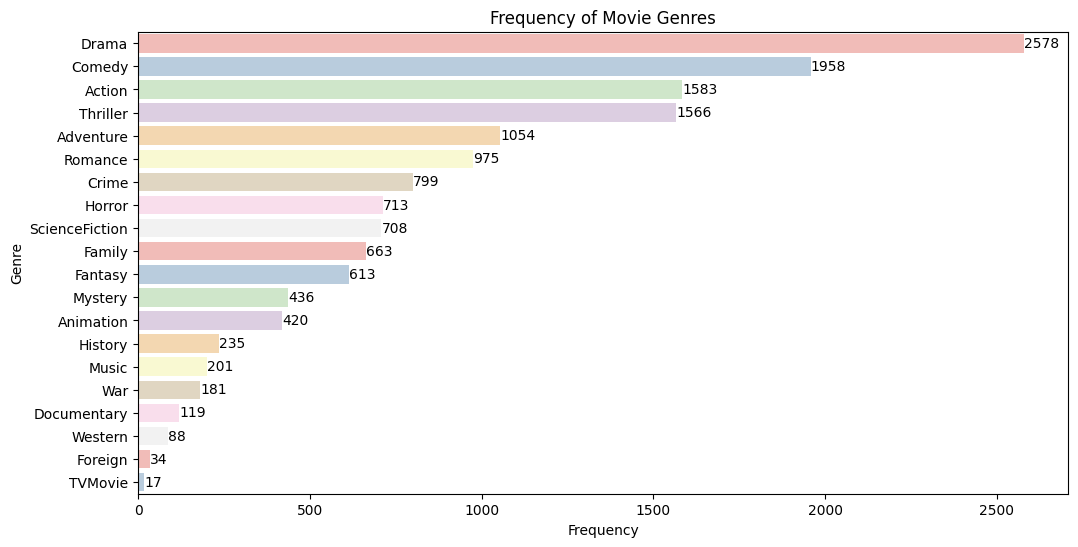

In [136]:
# Bar Chart of Genres

# Calculate genre counts
genre_counts = df1['genres'].explode().value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, legend=False, palette='Pastel1')
plt.title('Frequency of Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')

# Add labels to the bars
for i, count in enumerate(genre_counts.values):
    plt.text(count + 0.5, i, str(count), ha='left', va='center')

plt.show()

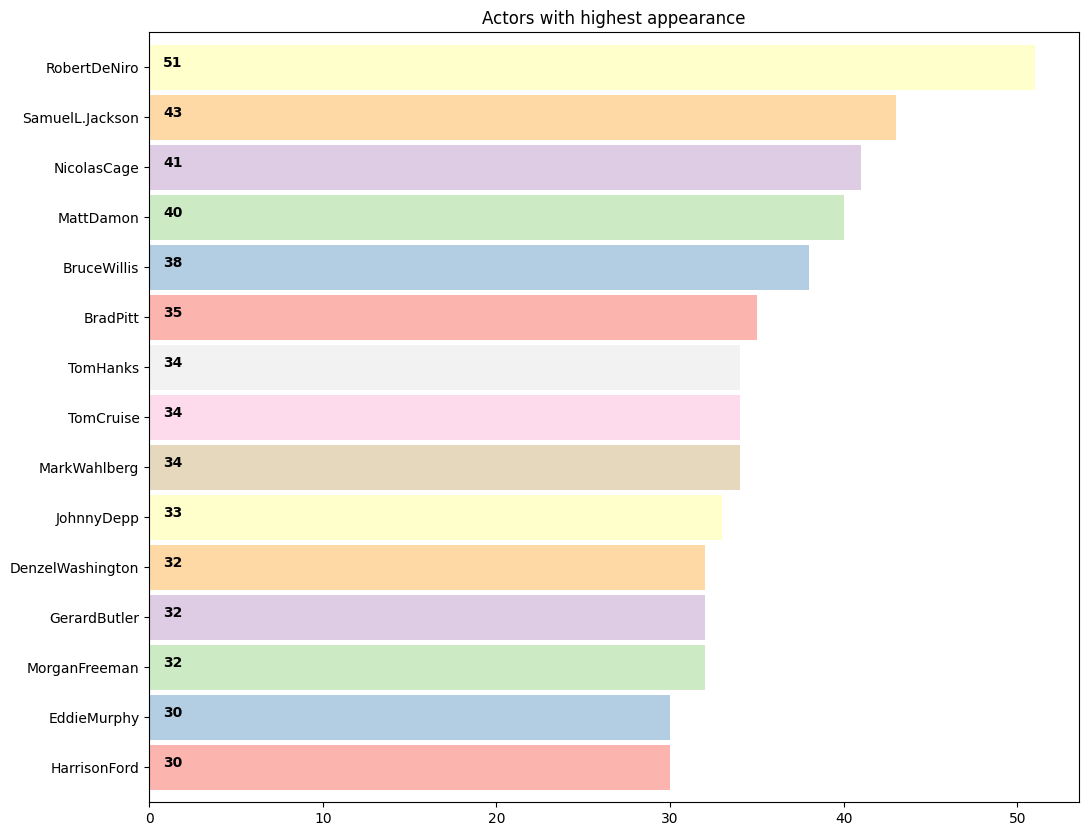

In [209]:
# Actors with highest appearance
plt.subplots(figsize=(12,10))
list1=[]
for i in df2['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Pastel1',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

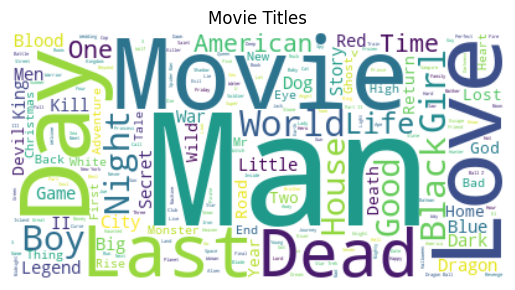

In [140]:
from wordcloud import WordCloud

# join all movie titles into a single string
titles = ' '.join(df1['title'].tolist())

# generate word cloud
wordcloud = WordCloud(background_color='white').generate(titles)

# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Titles')
plt.show()

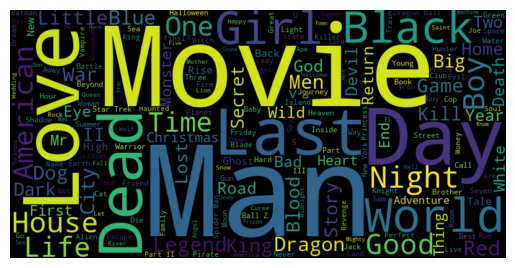

In [141]:
from wordcloud import WordCloud

# Concatenate all movie titles into a single string
all_titles = " ".join(df1["title"])

# Create a word cloud of the movie titles
wordcloud = WordCloud(width=800, height=400).generate(all_titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

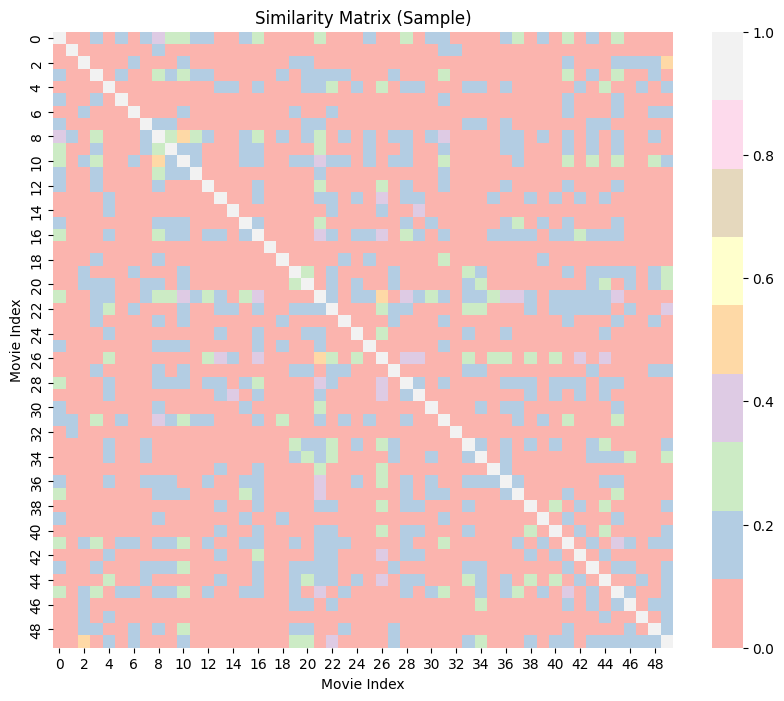

In [205]:
# Heatmap of Similarity Matrix
import numpy as np

# Define the size of the sample
sample_size = 50
# Take a random sample of movie indexes
sample_indexes = np.random.choice(similarity.shape[0], size=sample_size, replace=False)

# Extract the similarity matrix for the sample
sample_similarity = similarity[sample_indexes, :][:, sample_indexes]

# Plot the heatmap for the sample
plt.figure(figsize=(10, 8))
sns.heatmap(sample_similarity, cmap='Pastel1')
plt.title('Similarity Matrix (Sample)')
plt.xlabel('Movie Index')
plt.ylabel('Movie Index')
plt.show()


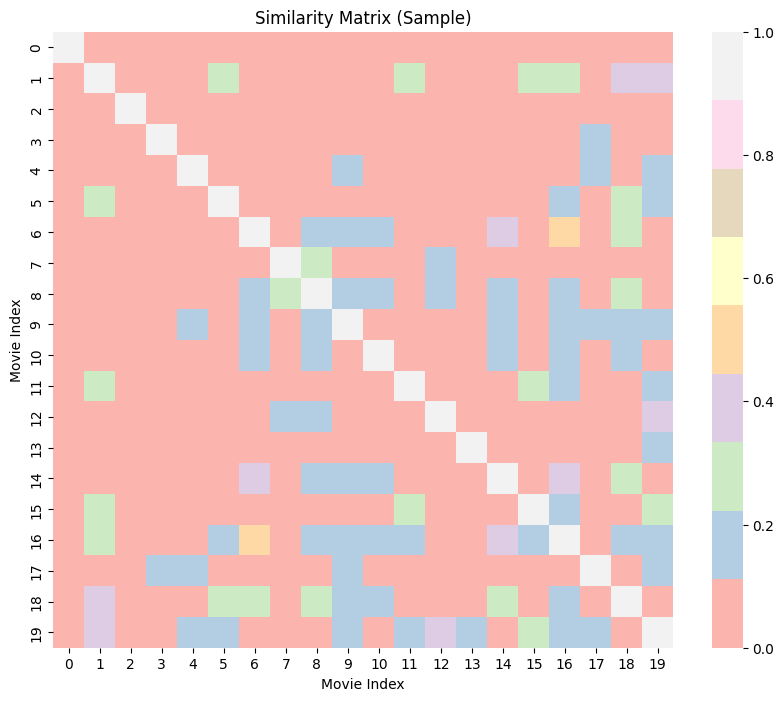

In [206]:
# Heatmap of Similarity Matrix
import numpy as np

# Define the size of the sample
sample_size = 20
# Take a random sample of movie indexes
sample_indexes = np.random.choice(similarity.shape[0], size=sample_size, replace=False)

# Extract the similarity matrix for the sample
sample_similarity = similarity[sample_indexes, :][:, sample_indexes]

# Plot the heatmap for the sample
plt.figure(figsize=(10, 8))
sns.heatmap(sample_similarity, cmap='Pastel1')
plt.title('Similarity Matrix (Sample)')
plt.xlabel('Movie Index')
plt.ylabel('Movie Index')
plt.show()
